In [13]:
##Importing the libraries

import numpy
import matplotlib.pyplot as plt
%matplotlib inline

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

K.set_image_dim_ordering('th')




In [14]:
# fix random seed for reproducibility
seed = 1234
numpy.random.seed(seed)


In [15]:
# Reading data

(traindf,y_train),(testdf,y_test)=mnist.load_data()



In [17]:
##Checking the shape of traindf
traindf.shape

(60000,)

In [5]:
##How the image looks like in numbers
traindf[5]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  13,  25, 100, 122,   7,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

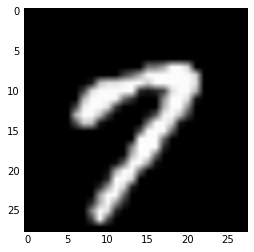

In [19]:
plt.imshow(traindf[15], cmap=plt.get_cmap('gray'))

In [20]:
# reshaping the data
#[samples][pixels][width][height]

traindf=traindf.reshape(traindf.shape[0],1,28,28).astype("float32")
testdf=testdf.reshape(testdf.shape[0],1,28,28).astype("float32")


In [21]:
# normalizing inputs to 0-1
traindf = traindf / 255
testdf = testdf / 255

In [22]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [24]:
num_classes

10

In [25]:
###Fittting the model architecture

def model_arc():
    model=Sequential()
    model.add(Conv2D(30,(4,4),input_shape=(1,28,28),activation="relu")) #Convolutional layer with 30 feature maps of size 4×4
    model.add(MaxPooling2D(pool_size=(2,2))) # Pooling layer with size 2*2 
    model.add(Conv2D(10,(2,2),activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    model.add(Flatten())  ###Converting 2D matrix into 1D vector
    model.add(Dense(128,activation="relu"))
    model.add(Dense(20,activation="relu"))
    model.add(Dense(num_classes,activation="softmax"))
    model.compile(optimizer="adam",metrics=["accuracy"],loss="categorical_crossentropy")
    return(model)

In [12]:
#Model Fitting and accuracy calculations
model = model_arc()
# Fit the model
model.fit(traindf, y_train, validation_data=(testdf, y_test), epochs=3, batch_size=200, verbose=2)

# Evaluation of the model

accuracy_scores = model.evaluate(testdf, y_test, verbose=0)
print("Error: %.2f%%" % (100-accuracy_scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
 - 287s - loss: 0.5701 - acc: 0.8195 - val_loss: 0.1241 - val_acc: 0.9624
Epoch 2/3
 - 291s - loss: 0.1680 - acc: 0.9488 - val_loss: 0.0780 - val_acc: 0.9756
Epoch 3/3
 - 289s - loss: 0.1295 - acc: 0.9605 - val_loss: 0.0615 - val_acc: 0.9822
Error: 1.78%


In [15]:
##Model Summary
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 25, 25)        510       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 12, 12)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 11, 11)        1210      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 10, 5, 5)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 10, 5, 5)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 250)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32128     
__________